## Zadanie 1

In [1]:
bitstring(Float16(1.0 / 3.0))

"0011010101010101"

In [2]:
bitstring(Float32(1.0) / Float32(3.0))

"00111110101010101010101010101011"

In [3]:
bitstring(1.0 / 3.0)

"0011111111010101010101010101010101010101010101010101010101010101"

In [4]:
bitstring(Float64(Float16(1.0) / Float16(3.0)))

"0011111111010101010101000000000000000000000000000000000000000000"

## Zadanie 2

In [5]:
using Plots

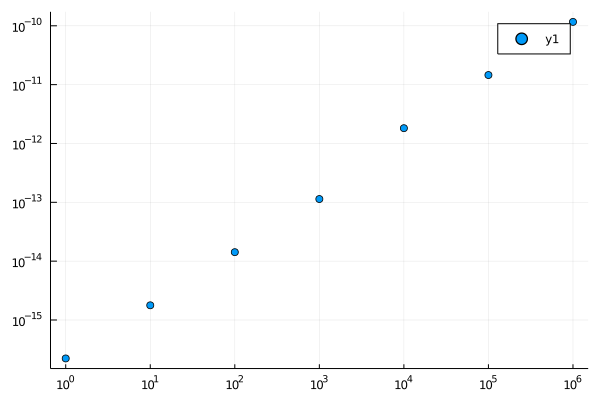

In [6]:
scatter(map(x -> 10 ^ x, 0:6), map(x -> eps(Float64(10 ^ x)), 0:6), xaxis=:log, yaxis=:log)

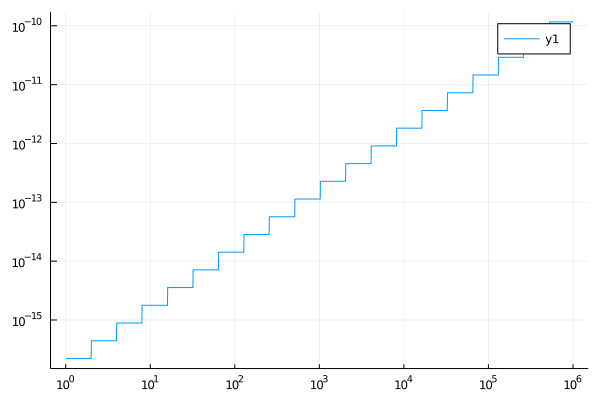

In [7]:
plot(eps, 1, 1e6, xaxis=:log, yaxis=:log)

## Zadanie 3

```c
#include <gsl/gsl_interp.h>
#include <stdio.h>

int main(void) {
    double d = 1.1;
    while (1) {
        gsl_ieee_printf_double(&d);
        printf("\n");
        d /= 2.0;
        if (d == 0) break;
    }
    return 0;
}
```

Najmniejsza możliwa mantysa to 2 ^ -1022

## Zadanie 4

Przykład algorytmu niestabilnego numerycznie:
    
Posłużymy się dwoma równaniami.

Pierwszym z nich będzie: `(sin x) ^ 2 / x ^ 2`

Drugim: `(1 - (cos x) ^ 2) / x ^ 2`

Oba równania wyznaczają matematycznie to samo (z jedynki trygonometrycznej).

In [8]:
f(x) = sin(x) ^ 2 / x ^ 2
g(x) = (1 - cos(x) ^ 2) / x ^ 2

g (generic function with 1 method)

Ogólnie funkcje wydają się zwracać ten sam rezultat

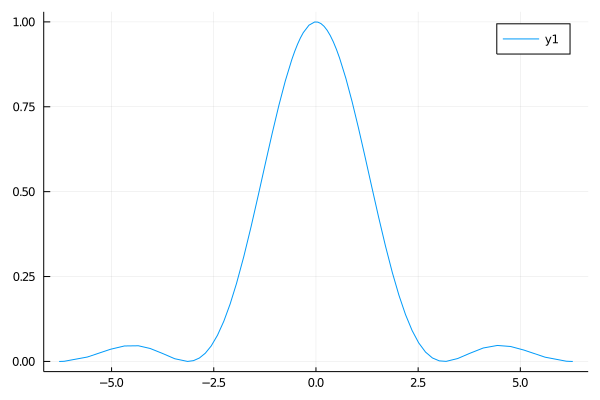

In [9]:
plot(f, -2pi, 2pi)

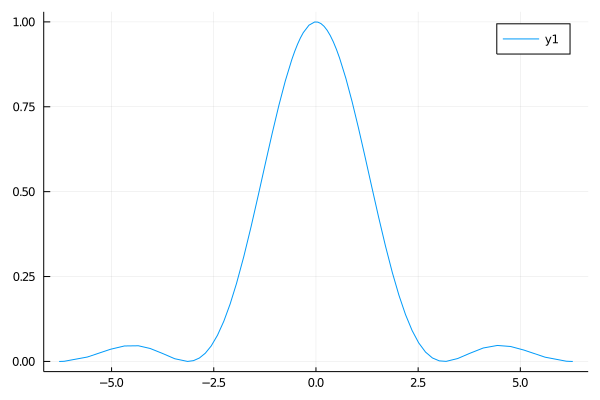

In [10]:
plot(g, -2pi, 2pi)

Jednak w okolicach zera funkcja g zachowuje się w sposób niespodziewany, co widać na poniższym wykresie

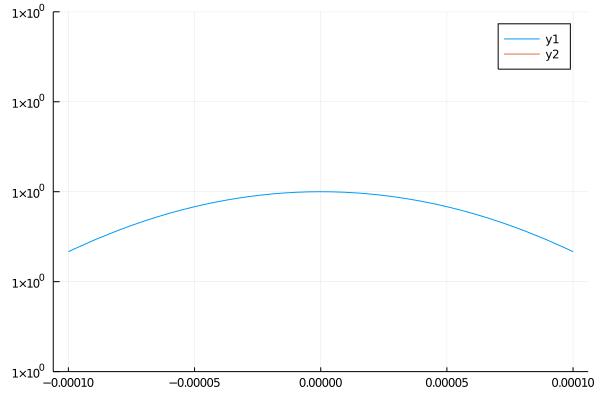

In [11]:
plot([f, g], -10^-4, 10^-4, ylim=(1 - 10^-8, 1 + 10^-8))

Jest to spowodowane błędem *catastrophic cancellation* -- odejmujemy od siebie bliskie liczby: `1` i `cos^2(x)` i dodatkowo dzielimy przez małą liczbę x^2

Aby uniknąć tego błędu należy skorzystać z funkcji f.